# Persiapan Data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


<Axes: title={'center': 'Distribusi Label Revenue'}, xlabel='Revenue'>

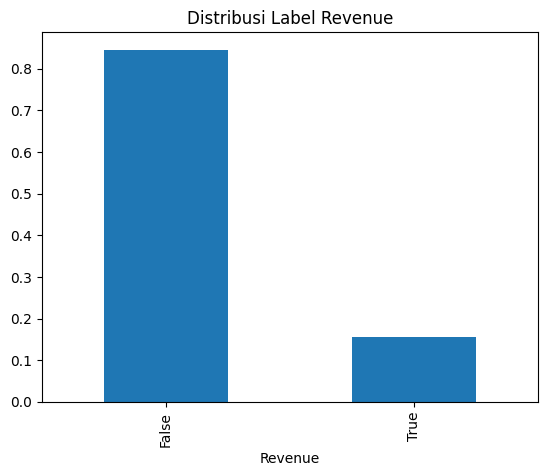

In [ ]:
df['Revenue'].value_counts(normalize=True).plot(kind='bar', title='Distribusi Label Revenue')

# Pre-processing

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=False)

# Label encoding
df_encoded['Weekend'] = df_encoded['Weekend'].astype(int)
df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)

print(df_encoded.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...      False       False   
1         0.00       0.10         0.0         0.0 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_chi2 = df_encoded.drop('Revenue', axis=1)
y_chi2 = df_encoded['Revenue']

selector = SelectKBest(score_func=chi2, k=20)
X_selected = selector.fit_transform(X_chi2, y_chi2)

selected_features = X_chi2.columns[selector.get_support()]

print("Fitur terpilih (Chi-square):", selected_features.tolist())

Fitur terpilih (Chi-square): ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Browser', 'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor']


In [ ]:
from sklearn.preprocessing import StandardScaler

X_selected_df = df_encoded[selected_features]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected_df)

X_scaled_df = pd.DataFrame(X_scaled_selected, columns=selected_features)

print(X_scaled_df.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay   Browser   Weekend  \
0     3.667189   3.229316   -0.317178   -0.308821 -0.790293 -0.550552   
1    -0.457683   1.171473   -0.317178   -0.308821 -0.207952 -0.550

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_chi2, test_size=0.3, random_state=42, stratify=y_chi2)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribusi sebelum SMOTE:", Counter(y_train))
print("Distribusi sesudah SMOTE:", Counter(y_train_balanced))

Distribusi sebelum SMOTE: Counter({0: 7295, 1: 1336})
Distribusi sesudah SMOTE: Counter({0: 7295, 1: 7295})


# SVM Manual

In [ ]:
import numpy as np

X_manual = np.array(X_train_balanced)
y_manual = y_train_balanced.replace(0, -1).values  # ubah 0 jadi -1

X_manual = X_manual.astype(float)

In [ ]:
# Inisialisasi
w = np.zeros(X_manual.shape[1])
b = 0
lr = 0.01
epochs = 1000
lambda_param = 0.1

In [ ]:
def fungsi_margin(w, b, X, y):
    hasil = np.dot(X, w)
    hasil = hasil + b
    hasil = y * hasil
    return hasil

In [ ]:
def fungsi_loss(w, b, X, y, lambda_param):
    margin = fungsi_margin(w, b, X, y)

    hasil_maximum = []
    for m in margin:
        if 1 - m > 0:
            hasil_maximum.append(1 - m)
        else:
            hasil_maximum.append(0)

    rata_rata = sum(hasil_maximum) / len(hasil_maximum)

    hasil_dot = 0
    for i in range(len(w)):
        hasil_dot = hasil_dot + w[i] * w[i]

    regulasi = 0.5 * lambda_param * hasil_dot

    loss = rata_rata + regulasi

    return loss

In [ ]:
def gradient_descent_batch(X, y, lr=0.01, lambda_param=0.1, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for epoch in range(epochs):
        margin = fungsi_margin(w, b, X, y)
        condition = margin < 1

        # Gradient (vectorized)
        dw = -np.dot(X[condition].T, y[condition]) / n_samples + lambda_param * w
        db = -np.sum(y[condition]) / n_samples

        # Update
        w -= lr * dw
        b -= lr * db

        if epoch % 100 == 0 or epoch == epochs - 1:
            loss = fungsi_loss(w, b, X, y, lambda_param)
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, b

# y_manual = -1 dan +1
w_akhir, b_akhir = gradient_descent_batch(X_manual, y_manual, lr=0.01, lambda_param=0.1, epochs=1000)
print("Bobot akhir:", w_akhir)
print("Bias akhir:", b_akhir)

Epoch 0, Loss: 0.9914096529299562
Epoch 100, Loss: 0.6417020401346266
Epoch 200, Loss: 0.5951293893389963
Epoch 300, Loss: 0.5705890943206524
Epoch 400, Loss: 0.5569784852015545
Epoch 500, Loss: 0.5492751203887236
Epoch 600, Loss: 0.5447721267030559
Epoch 700, Loss: 0.5421426483652081
Epoch 800, Loss: 0.5405681781261987
Epoch 900, Loss: 0.539612077422186
Epoch 999, Loss: 0.5390168069153874
Bobot akhir: [ 0.07486778  0.01769238  0.04137845 -0.00713015  0.1377667   0.125827
 -0.06027697 -0.17731655  1.03176792 -0.04372643  0.01677535  0.01654638
 -0.0745722  -0.03324707 -0.0679876  -0.09264989  0.19200319 -0.00124531
  0.01424172  0.00304189]
Bias akhir: -0.44274571624400333


In [ ]:
# Konversi y_test ke -1/+1
y_test_manual = y_test.replace(0, -1).values
X_test_manual = X_test.astype(float)

# Prediksi
y_pred_test = np.dot(X_test_manual, w_akhir) + b_akhir
y_pred_label = np.where(y_pred_test >= 0, 1, -1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Konversi label ke 0/1 lagi
y_pred_final = np.where(y_pred_label == -1, 0, 1)
y_true_final = np.where(y_test_manual == -1, 0, 1)

print("Akurasi:", accuracy_score(y_true_final, y_pred_final))
print(classification_report(y_true_final, y_pred_final))

Akurasi: 0.8610435252771019
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3127
           1       0.54      0.72      0.61       572

    accuracy                           0.86      3699
   macro avg       0.74      0.80      0.76      3699
weighted avg       0.88      0.86      0.87      3699



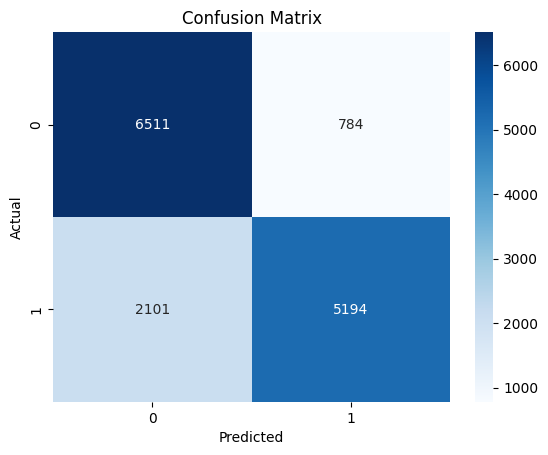

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.sign(np.dot(X_manual, w_akhir) + b_akhir)
cm = confusion_matrix(y_manual, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

joblib.dump({
    'weights': w_akhir,
    'bias': b_akhir,
    'scaler': scaler,
    'features': selected_features
}, 'svm_manual_model.pkl')

print("Model disimpan")

Model disimpan


In [ ]:
model = joblib.load("svm_manual_model.pkl")

w_akhir = model['weights']
b_akhir = model['bias']
scaler = model['scaler']
selected_features = model['features']

def ambil_input():
    print("Masukkan data pengunjung (input sesuai instruksi):")
    data_user = {
        'Administrative': int(input("Administrative: ")),
        'Administrative_Duration': float(input("Administrative_Duration: ")),
        'Informational': int(input("Informational: ")),
        'Informational_Duration': float(input("Informational_Duration: ")),
        'ProductRelated': int(input("ProductRelated: ")),
        'ProductRelated_Duration': float(input("ProductRelated_Duration: ")),
        'BounceRates': float(input("BounceRates (0–1): ")),
        'ExitRates': float(input("ExitRates (0–1): ")),
        'PageValues': float(input("PageValues: ")),
        'SpecialDay': float(input("SpecialDay (0 atau 0.2–1.0): ")),
        'Browser': int(input("Browser: ")),
        'Weekend': input("Weekend? (yes/no): ").strip().lower() == "yes",
        'Month': input("Month (Dec, Feb, Mar, May, Nov, Oct): "),
        'VisitorType': input("VisitorType (New_Visitor / Returning_Visitor): ")
    }
    return data_user

def proses_input(dict_userinput):
    df = pd.DataFrame([dict_userinput])

    df['Weekend'] = int(df['Weekend'].iloc[0])

    for m in ['Dec', 'Feb', 'Mar', 'May', 'Nov', 'Oct']:
        df[f'Month_{m}'] = 1 if df['Month'].iloc[0] == m else 0

    df['VisitorType_New_Visitor'] = 1 if df['VisitorType'].iloc[0] == 'New_Visitor' else 0
    df['VisitorType_Returning_Visitor'] = 1 if df['VisitorType'].iloc[0] == 'Returning_Visitor' else 0

    df = df.drop(columns=['Month', 'VisitorType'])

    for col in selected_features:
        if col not in df:
            df[col] = 0

    df = df[selected_features]

    scaled_input = scaler.transform(df)

    return scaled_input

def prediksi_svm(dict_userinput):
    x_input = proses_input(dict_userinput)
    hasil_pred = np.dot(x_input, w_akhir) + b_akhir
    return int(hasil_pred >= 0)

if __name__ == "__main__":
    input_user = ambil_input()
    hasil = prediksi_svm(input_user)
    print("\nHasil Prediksi:", "Membeli" if hasil == 1 else "Tidak Membeli")

Masukkan data pengunjung (input sesuai instruksi):
Administrative: 0
Administrative_Duration: 0
Informational: 0
Informational_Duration: 0
ProductRelated: 1
ProductRelated_Duration: 0
BounceRates (0–1): 0.2
ExitRates (0–1): 0.2
PageValues: 0
SpecialDay (0 atau 0.2–1.0): 0
Browser: 1
Weekend? (yes/no): no
Month (Dec, Feb, Mar, May, Nov, Oct): Feb
VisitorType (New_Visitor / Returning_Visitor): Returning_Visitor

Hasil Prediksi: Tidak Membeli


<ipython-input-26-69194381953a>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(hasil_pred >= 0)


In [ ]:
model = joblib.load("svm_manual_model.pkl")

w_akhir = model['weights']
b_akhir = model['bias']
scaler = model['scaler']
selected_features = model['features']

def ambil_input():
    print("Masukkan data pengunjung (input sesuai instruksi):")
    data_user = {
        'Administrative': int(input("Administrative: ")),
        'Administrative_Duration': float(input("Administrative_Duration: ")),
        'Informational': int(input("Informational: ")),
        'Informational_Duration': float(input("Informational_Duration: ")),
        'ProductRelated': int(input("ProductRelated: ")),
        'ProductRelated_Duration': float(input("ProductRelated_Duration: ")),
        'BounceRates': float(input("BounceRates (0–1): ")),
        'ExitRates': float(input("ExitRates (0–1): ")),
        'PageValues': float(input("PageValues: ")),
        'SpecialDay': float(input("SpecialDay (0 atau 0.2–1.0): ")),
        'Browser': int(input("Browser: ")),
        'Weekend': input("Weekend? (yes/no): ").strip().lower() == "yes",
        'Month': input("Month (Dec, Feb, Mar, May, Nov, Oct): "),
        'VisitorType': input("VisitorType (New_Visitor / Returning_Visitor): ")
    }
    return data_user

def proses_input(dict_userinput):
    df = pd.DataFrame([dict_userinput])

    df['Weekend'] = int(df['Weekend'].iloc[0])

    for m in ['Dec', 'Feb', 'Mar', 'May', 'Nov', 'Oct']:
        df[f'Month_{m}'] = 1 if df['Month'].iloc[0] == m else 0

    df['VisitorType_New_Visitor'] = 1 if df['VisitorType'].iloc[0] == 'New_Visitor' else 0
    df['VisitorType_Returning_Visitor'] = 1 if df['VisitorType'].iloc[0] == 'Returning_Visitor' else 0

    df = df.drop(columns=['Month', 'VisitorType'])

    for col in selected_features:
        if col not in df:
            df[col] = 0

    df = df[selected_features]

    scaled_input = scaler.transform(df)

    return scaled_input

def prediksi_svm(dict_userinput):
    x_input = proses_input(dict_userinput)
    hasil_pred = np.dot(x_input, w_akhir) + b_akhir
    return int(hasil_pred >= 0)

if __name__ == "__main__":
    input_user = ambil_input()
    hasil = prediksi_svm(input_user)
    print("\nHasil Prediksi:", "Membeli" if hasil == 1 else "Tidak Membeli")

Masukkan data pengunjung (input sesuai instruksi):
Administrative: 2
Administrative_Duration: 56
Informational: 1
Informational_Duration: 144
ProductRelated: 67
ProductRelated_Duration: 2563.783
BounceRates (0–1): 0
ExitRates (0–1): 0.005797
PageValues: 19.34265
SpecialDay (0 atau 0.2–1.0): 0
Browser: 2
Weekend? (yes/no): no
Month (Dec, Feb, Mar, May, Nov, Oct): Mar
VisitorType (New_Visitor / Returning_Visitor): New_Visitor

Hasil Prediksi: Membeli


<ipython-input-27-69194381953a>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(hasil_pred >= 0)
